In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train=pd.read_csv(r"C:\Users\MURUGAN K\Desktop\GUVI_Assignments\Task6\data\train.csv")

In [3]:
df_test=pd.read_csv(r"C:\Users\MURUGAN K\Desktop\GUVI_Assignments\Task6\data\test.csv")

In [4]:
df_train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [5]:
df_test.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       105 non-null    int64  
 1   CRIM     105 non-null    float64
 2   ZN       105 non-null    float64
 3   INDUS    105 non-null    float64
 4   CHAS     105 non-null    int64  
 5   NOX      105 non-null    float64
 6   RM       105 non-null    float64
 7   AGE      105 non-null    float64
 8   DIS      105 non-null    float64
 9   RAD      105 non-null    int64  
 10  TAX      105 non-null    float64
 11  PTRATIO  105 non-null    float64
 12  B        105 non-null    float64
 13  LSTAT    105 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.6 KB


In [8]:
#checking null values
print(df_train.isnull().sum())
print(df_test.isnull().sum())

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [9]:
#checking repeating values
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [10]:
df_train.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<AxesSubplot: >

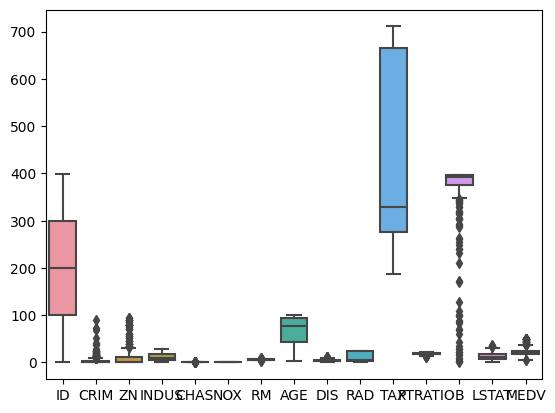

In [11]:
#visualizing data for outlier removal
import seaborn as sns
sns.boxplot(data=df_train)

In [12]:
df_train.shape

(400, 15)

<AxesSubplot: >

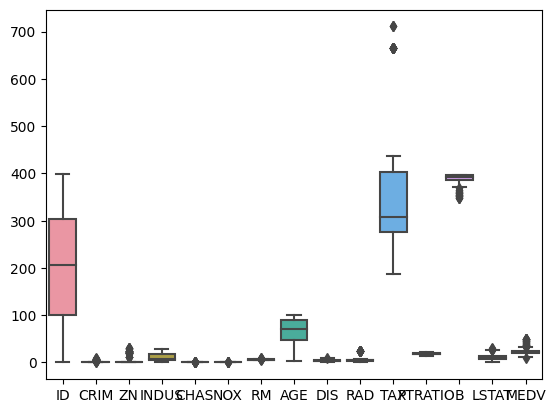

In [13]:
#outlier removal with IQR method in CRIM,ZN, DIS,'PTRATIO', 'B','LSTAT'
final_list=[]
for i in ["CRIM","ZN","DIS","RAD","TAX","PTRATIO","B","LSTAT"]:
    Q1=np.percentile(df_train[i],25)
    Q3=np.percentile(df_train[i],75)
    IQR=Q3-Q1
    min=Q1-1.5*IQR
    max=Q3+1.5*IQR
    elements_more_than_max=df_train[i]>=max
    elements_less_than_min=df_train[i]<=min
    indices_of_upper_outlier=np.where(elements_more_than_max)
    indices_of_lower_outlier=np.where(elements_less_than_min)
    #print(indices_of_upper_outlier)
    #print(indices_of_lower_outlier)
    if len(indices_of_upper_outlier[0])>0:
        final_list.extend(list(indices_of_upper_outlier[0]))
    if len(indices_of_lower_outlier[0])>0:
        final_list.extend(list(indices_of_lower_outlier[0]))
final_list=list(set(final_list))
#print(final_list)
if final_list:
    df_train.drop(final_list,inplace=True)   #updated in df
import seaborn as sns
sns.boxplot(data=df_train)
#removed outliers in Year columns

In [14]:
df_test.shape

(105, 14)

<AxesSubplot: >

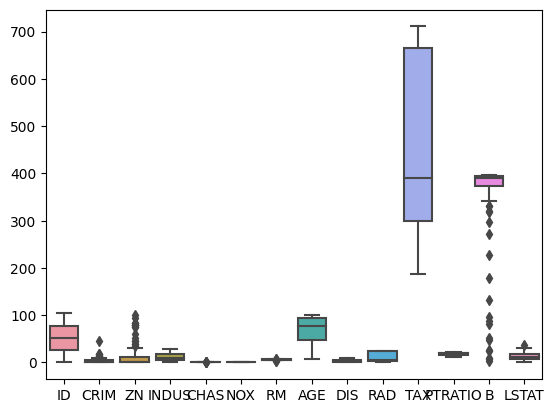

In [15]:
#visualizing data for outlier removal
import seaborn as sns
sns.boxplot(data=df_test)

<AxesSubplot: >

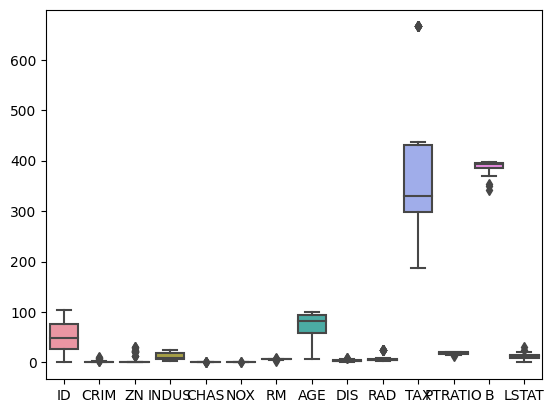

In [16]:
#outlier removal with IQR method in CRIM,ZN, DIS,'PTRATIO', 'B','LSTAT'
final_list=[]
for i in ["CRIM","ZN","DIS","RAD","TAX","PTRATIO","B","LSTAT"]:
    Q1=np.percentile(df_test[i],25)
    Q3=np.percentile(df_test[i],75)
    IQR=Q3-Q1
    min=Q1-1.5*IQR
    max=Q3+1.5*IQR
    elements_more_than_max=df_test[i]>=max
    elements_less_than_min=df_test[i]<=min
    indices_of_upper_outlier=np.where(elements_more_than_max)
    indices_of_lower_outlier=np.where(elements_less_than_min)
    #print(indices_of_upper_outlier)
    #print(indices_of_lower_outlier)
    if len(indices_of_upper_outlier[0])>0:
        final_list.extend(list(indices_of_upper_outlier[0]))
    if len(indices_of_lower_outlier[0])>0:
        final_list.extend(list(indices_of_lower_outlier[0]))
final_list=list(set(final_list))
#print(final_list)
if final_list:
    df_test.drop(final_list,inplace=True)   #updated in df
import seaborn as sns
sns.boxplot(data=df_test)
#removed outliers in Year columns

In [17]:
df_test.shape

(67, 14)

In [18]:
# Min Max Scaling for df_train
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
df_train[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']]=MMS.fit_transform(df_train[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']])

In [19]:
df_train

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,1,0.001062,0.933333,0.518209,0,0.119048,0.337374,0.267765,0.313383,0.130435,0.156788,0.538462,0.988372,0.148494,25.0
2,2,0.138443,0.000000,0.690440,0,0.424242,0.526180,0.973223,0.092385,0.173913,0.411090,0.000000,0.317217,0.092420,41.3
3,3,0.649270,0.000000,0.634294,0,0.716450,0.339438,1.000000,0.108139,1.000000,0.913958,0.846154,0.975316,0.507788,18.4
4,4,0.002981,0.000000,0.070561,0,0.110390,0.320093,0.301751,0.586164,0.130435,0.462715,0.338462,0.422073,0.248183,19.8
7,7,0.379608,0.000000,0.690440,1,1.000000,0.128966,1.000000,0.023723,0.173913,0.411090,0.000000,1.000000,0.861890,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,393,0.065600,0.000000,0.778073,0,0.465368,0.378901,0.978373,0.147999,0.130435,0.476099,1.000000,0.772746,0.318449,23.0
394,394,0.005644,0.000000,0.057284,0,0.077922,0.648182,0.613800,0.292291,0.043478,0.168260,0.507692,1.000000,0.147802,33.2
396,396,0.017884,0.000000,0.173748,0,0.194805,0.274181,0.281153,0.335796,0.173913,0.173996,0.692308,0.929213,0.284181,24.7
397,397,0.762933,0.000000,0.634294,0,0.658009,0.364715,0.824923,0.198287,1.000000,0.913958,0.846154,1.000000,0.417792,19.5


In [20]:
df_test[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']]=MMS.transform(df_test[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']])
df_test

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.009958,1.000000,0.134674,0,0.041126,0.307454,0.640577,0.643310,0.217391,0.214149,0.292308,0.953488,0.362755
1,1,0.036975,0.000000,0.227618,0,0.181818,0.389992,0.383110,0.443762,0.173913,0.189293,0.753846,1.000000,0.145379
3,3,0.023614,0.416667,0.246206,0,0.248918,0.380191,0.941298,0.644620,0.173913,0.235182,0.076923,0.910649,0.641398
5,5,0.003722,0.000000,0.117982,0,0.086580,0.286820,0.434604,0.407448,0.086957,0.112811,0.584615,0.981436,0.378678
6,6,0.035174,0.000000,0.778073,0,0.465368,0.394119,0.987642,0.084378,0.130435,0.476099,1.000000,1.000000,0.466251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,99,0.005677,0.000000,0.040971,0,0.170996,0.320093,0.610711,0.181422,0.086957,0.009560,0.476923,1.000000,0.260644
100,100,0.019687,0.733333,0.169954,0,0.047619,0.468145,0.150360,0.827462,0.260870,0.271511,0.676923,0.935537,0.160609
101,101,0.798258,0.000000,0.634294,0,0.629870,0.208924,0.969104,0.098464,1.000000,0.913958,0.846154,0.949612,0.525787
102,102,0.003920,0.700000,0.161608,0,0.064935,0.414754,0.187436,0.702445,0.130435,0.105163,0.323077,1.000000,0.116303


<AxesSubplot: >

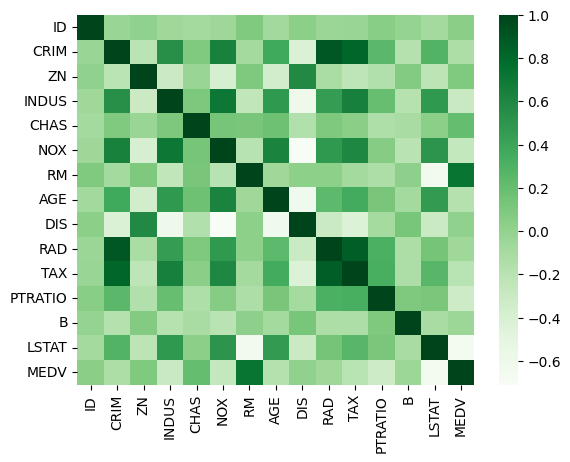

In [21]:
#print(df_train.corr())
import seaborn as sns
sns.heatmap(df_train.corr(),cmap="Greens")
#df_train.corr()

<AxesSubplot: >

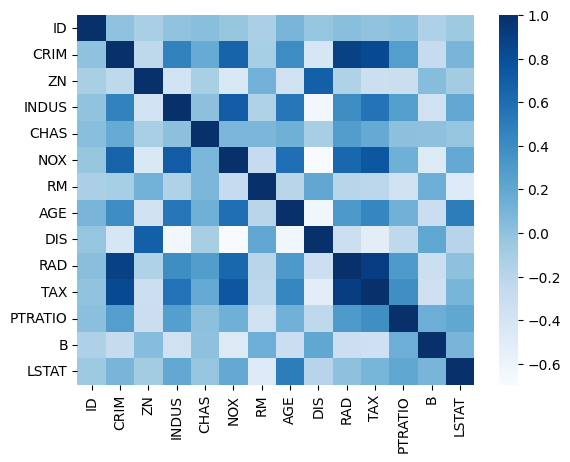

In [22]:
import seaborn as sns
sns.heatmap(df_test.corr(),cmap="Blues")

In [23]:
df_train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,1,0.001062,0.933333,0.518209,0,0.119048,0.337374,0.267765,0.313383,0.130435,0.156788,0.538462,0.988372,0.148494,25.0
2,2,0.138443,0.000000,0.690440,0,0.424242,0.526180,0.973223,0.092385,0.173913,0.411090,0.000000,0.317217,0.092420,41.3
3,3,0.649270,0.000000,0.634294,0,0.716450,0.339438,1.000000,0.108139,1.000000,0.913958,0.846154,0.975316,0.507788,18.4
4,4,0.002981,0.000000,0.070561,0,0.110390,0.320093,0.301751,0.586164,0.130435,0.462715,0.338462,0.422073,0.248183,19.8
7,7,0.379608,0.000000,0.690440,1,1.000000,0.128966,1.000000,0.023723,0.173913,0.411090,0.000000,1.000000,0.861890,13.4


In [24]:
df_test.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.009958,1.000000,0.134674,0,0.041126,0.307454,0.640577,0.643310,0.217391,0.214149,0.292308,0.953488,0.362755
1,1,0.036975,0.000000,0.227618,0,0.181818,0.389992,0.383110,0.443762,0.173913,0.189293,0.753846,1.000000,0.145379
3,3,0.023614,0.416667,0.246206,0,0.248918,0.380191,0.941298,0.644620,0.173913,0.235182,0.076923,0.910649,0.641398
5,5,0.003722,0.000000,0.117982,0,0.086580,0.286820,0.434604,0.407448,0.086957,0.112811,0.584615,0.981436,0.378678
6,6,0.035174,0.000000,0.778073,0,0.465368,0.394119,0.987642,0.084378,0.130435,0.476099,1.000000,1.000000,0.466251


<AxesSubplot: >

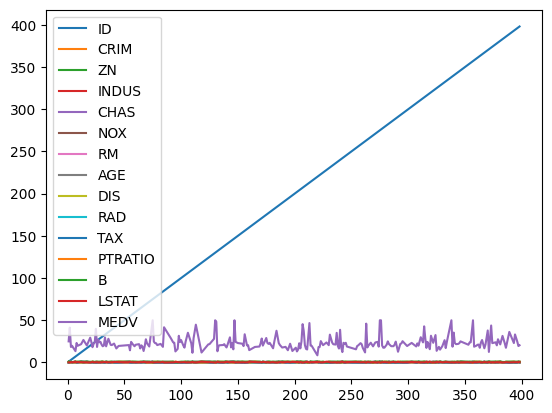

In [25]:
df_train.plot()

<AxesSubplot: >

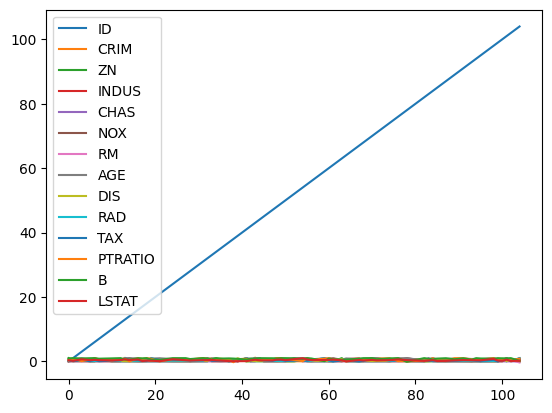

In [26]:
df_test.plot()

In [27]:
X=df_train.iloc[:,:-1]
y=df_train.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(198, 14)
(50, 14)
(198,)
(50,)


In [28]:
#sgd regressor with different alpha values (Constant that multiplies the regularization term)
#higher the value stronger regularisation
from sklearn.linear_model import SGDRegressor
for i in [1.75,1.5,1.3]:
    sgd=SGDRegressor(alpha=i,random_state=0)
    sgd.fit(X_train,y_train)
    y_pred=sgd.predict(X_test)
    print("for alpha value",i)
    print("score",sgd.score(X_test,y_test))
    print("intercept",sgd.intercept_)
    print("coeff",sgd.coef_)
    print("no_of_iter",sgd.n_iter_)

for alpha value 1.75
score -2.9141632614259607e+24
intercept [-2.18583846e+10]
coeff [ 7.10236018e+10  7.08499710e+09  2.34542832e+08  9.17489192e+09
  2.06753464e+08  8.50555297e+09 -3.92511915e+08 -8.84313800e+08
 -1.15710947e+09  9.63508866e+09  9.21933522e+09  7.99734020e+08
  1.58493545e+09  1.86207382e+09]
no_of_iter 33
for alpha value 1.5
score -2.7586895261549275e+24
intercept [-2.86557844e+09]
coeff [ 6.90243364e+10  7.39265573e+09 -2.79064801e+09  7.76887718e+09
 -4.21146030e+09  8.16526790e+09  1.67385525e+09  2.91529103e+09
 -7.43393494e+09  1.30930674e+10  1.27258414e+10  4.50543265e+09
  2.39890826e+08  1.95271283e+09]
no_of_iter 44
for alpha value 1.3
score -6.999374102117136e+24
intercept [-3.55064337e+10]
coeff [-1.09895566e+11  1.85779633e+09 -1.18469360e+08  2.26815760e+09
  2.02276552e+09 -5.27067618e+08 -1.33117724e+09  6.01724057e+08
  1.39727106e+09  9.48092070e+07 -2.63396946e+09 -3.46368790e+09
  7.91127165e+09 -1.21603880e+09]
no_of_iter 44


In [29]:
#comparison of SGD regressor l2 norm and l1 norm, elasticnet in penalty parameter
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
for i in ['l2','l1','elasticnet']:
    sgd=SGDRegressor(penalty=i,random_state=0)
    sgd.fit(X_train,y_train)
    y_pred=sgd.predict(X_test)
    print("for penalty value",i)
    print("score",sgd.score(X_test,y_test))
    print("intercept",sgd.intercept_)
    print("coeff",sgd.coef_)
    print("no_of_iter",sgd.n_iter_)
    print("mean square error",mean_squared_error(y_test,y_pred)) #sgd
    print("mean absolute error",mean_absolute_error(y_test,y_pred)) 

for penalty value l2
score -1.8507953713617466e+24
intercept [-5.00890451e+10]
coeff [ 5.70730618e+10 -1.78730212e+10 -4.06911751e+10 -1.63923552e+10
  7.18391395e+10 -1.32122376e+09 -1.42011872e+10  2.23206205e+10
 -3.56920375e+10 -3.21114162e+10 -3.33097270e+10 -5.84390509e+10
 -1.72357663e+10 -2.87659105e+10]
no_of_iter 33
mean square error 1.861505479984928e+26
mean absolute error 12138542629329.098
for penalty value l1
score -2.8732512042136564e+24
intercept [-1.66546384e+10]
coeff [ 7.07841815e+10 -3.10351515e+10  3.80505118e+10 -3.23119139e+10
  5.47153065e+09 -5.11441074e+10  6.40505002e+09 -1.04827867e+11
  1.92354072e+10 -1.97281843e+10 -3.94736389e+10 -5.68227702e+07
  4.31981130e+10 -5.96188527e+10]
no_of_iter 44
mean square error 2.8898780193521516e+26
mean absolute error 15140856040043.02
for penalty value elasticnet
score -6.938694874497014e+23
intercept [-1.15643048e+10]
coeff [-3.46132529e+10 -5.41900560e+09  2.26299893e+10 -3.02896766e+10
  2.26045517e+10 -6.68144821e

In [44]:
sgd=SGDRegressor(random_state=0) #proceeding with default alpha value
sgd.fit(X_train,y_train)
y_pred=sgd.predict(X_test)
print("score",sgd.score(X_test,y_test))
sgd.intercept_

score -1.8507953713617466e+24


array([-5.00890451e+10])

In [31]:
sgd.coef_

array([ 5.70730618e+10, -1.78730212e+10, -4.06911751e+10, -1.63923552e+10,
        7.18391395e+10, -1.32122376e+09, -1.42011872e+10,  2.23206205e+10,
       -3.56920375e+10, -3.21114162e+10, -3.33097270e+10, -5.84390509e+10,
       -1.72357663e+10, -2.87659105e+10])

In [32]:
sgd.n_iter_

33

In [33]:
#Applying cross validation
from sklearn.model_selection import cross_val_score
CV_scores=cross_val_score(sgd,X_train,y_train,cv=5)

In [34]:
CV_scores

array([-3.59913572e+22, -1.86905328e+22, -3.67083507e+25, -6.86640433e+24,
       -4.77254104e+25])

In [35]:
CV_scores.mean()

-1.8270969475022925e+25

In [36]:
CV_scores.std()

2.0016120199680344e+25

In [37]:
df_train.corr()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
ID,1.000000,-0.029661,0.014214,-0.055921,-0.080207,-0.054007,0.091634,-0.073376,0.037140,-0.039689,-0.031440,0.048812,-0.004942,-0.085011,0.041488
CRIM,-0.029661,1.000000,-0.210359,0.539376,0.086494,0.633422,-0.075976,0.367926,-0.422638,0.893424,0.817719,0.247056,-0.173820,0.288999,-0.129420
ZN,0.014214,-0.210359,1.000000,-0.306544,-0.031436,-0.393692,0.095916,-0.349377,0.581974,-0.115412,-0.230166,-0.166278,0.075930,-0.220661,0.088023
INDUS,-0.055921,0.539376,-0.306544,1.000000,0.109008,0.705648,-0.239202,0.477976,-0.608731,0.450792,0.651388,0.193783,-0.187878,0.473437,-0.282277
CHAS,-0.080207,0.086494,-0.031436,0.109008,1.000000,0.133177,0.118561,0.168121,-0.166053,0.092253,0.042730,-0.146616,-0.108382,0.036309,0.208129
NOX,-0.054007,0.633422,-0.393692,0.705648,0.133177,1.000000,-0.194634,0.619687,-0.709477,0.477177,0.602628,0.060874,-0.206309,0.509266,-0.265277
RM,0.091634,-0.075976,0.095916,-0.239202,0.118561,-0.194634,1.000000,-0.058664,0.026748,0.027834,-0.086169,-0.138419,0.021753,-0.645256,0.728639
AGE,-0.073376,0.367926,-0.349377,0.477976,0.168121,0.619687,-0.058664,1.000000,-0.628882,0.241688,0.352427,0.120565,-0.075503,0.465332,-0.174790
DIS,0.037140,-0.422638,0.581974,-0.608731,-0.166053,-0.709477,0.026748,-0.628882,1.000000,-0.291056,-0.431166,-0.091230,0.130882,-0.301917,0.012848
RAD,-0.039689,0.893424,-0.115412,0.450792,0.092253,0.477177,0.027834,0.241688,-0.291056,1.000000,0.860732,0.318598,-0.130467,0.143420,-0.056307


In [38]:
#Applying regularisation L2 Ridge
from sklearn.linear_model import Ridge
for i in [1.75,1.5,1.3]:
    ridge=Ridge(alpha=i)
    ridge.fit(X_train,y_train)
    print("score train",ridge.score(X_train,y_train))
    print("score test",ridge.score(X_test,y_test))
    y_pred_1=ridge.predict(X_test)
    print(ridge.coef_)
#Ridge score is better than other models

score train 0.7212353190602104
score test 0.48460901215991614
[-8.13014545e-04  7.67883710e-01 -5.97908730e-03 -1.28834764e+00
  2.78034505e+00 -4.26248147e+00  1.72325904e+01 -1.52840254e+00
 -4.61157096e+00  1.60121882e+00 -3.27357646e+00 -5.74371053e+00
 -1.58250077e+00 -9.09528875e+00]
score train 0.725326091039643
score test 0.49016776821841734
[-8.81345141e-04  9.11598413e-01 -1.03479211e-02 -1.18887430e+00
  2.76745075e+00 -4.46715249e+00  1.78619965e+01 -1.61811969e+00
 -4.86644275e+00  1.65177443e+00 -3.45064088e+00 -5.80256966e+00
 -1.59482357e+00 -9.00925136e+00]
score train 0.7285170475339677
score test 0.4944104902535217
[-9.40290829e-04  1.04570281e+00 -1.20656255e-02 -1.09817359e+00
  2.75335964e+00 -4.65571267e+00  1.84204316e+01 -1.70570749e+00
 -5.09463733e+00  1.69206535e+00 -3.61013798e+00 -5.84926058e+00
 -1.60315871e+00 -8.90295553e+00]


In [39]:
#default alpha value is 1
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))
y_pred_1=ridge.predict(X_test)
print(ridge.coef_)
print(sgd.coef_)

0.7331061604253359
0.5002271767545561
[-1.03746463e-03  1.28878429e+00 -1.06049806e-02 -9.40134713e-01
  2.72444520e+00 -4.99232517e+00  1.93739645e+01 -1.87229959e+00
 -5.48831530e+00  1.74954653e+00 -3.88464634e+00 -5.91799718e+00
 -1.61212068e+00 -8.65856155e+00]
[ 5.70730618e+10 -1.78730212e+10 -4.06911751e+10 -1.63923552e+10
  7.18391395e+10 -1.32122376e+09 -1.42011872e+10  2.23206205e+10
 -3.56920375e+10 -3.21114162e+10 -3.33097270e+10 -5.84390509e+10
 -1.72357663e+10 -2.87659105e+10]


In [45]:
#Applying regularisation L1 Lasso
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=3)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))
y_pred_2=lasso.predict(X_test)

0.0014841158546886613
-0.06223832853703026


In [46]:
print(lasso.coef_)
print(sgd.coef_)

[ 0.00220855 -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.        ]
[ 5.70730618e+10 -1.78730212e+10 -4.06911751e+10 -1.63923552e+10
  7.18391395e+10 -1.32122376e+09 -1.42011872e+10  2.23206205e+10
 -3.56920375e+10 -3.21114162e+10 -3.33097270e+10 -5.84390509e+10
 -1.72357663e+10 -2.87659105e+10]


In [47]:
#Applying regularisation Elastic net
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=3)
elastic.fit(X_train,y_train)
print(elastic.score(X_train,y_train))
print(elastic.score(X_test,y_test))
y_pred_3=elastic.predict(X_test)

0.0014931783352154504
-0.0621516371820765


In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred)) #sgd
print(mean_absolute_error(y_test,y_pred)) 
print(mean_squared_error(y_test,y_pred_1)) #ridge
print(mean_absolute_error(y_test,y_pred_1)) 
print(mean_squared_error(y_test,y_pred_2)) #lasso
print(mean_absolute_error(y_test,y_pred_2))
print(mean_squared_error(y_test,y_pred_3)) #elastic
print(mean_absolute_error(y_test,y_pred_3)) 

1.861505479984928e+26
12138542629329.098
50.26648886280877
4.005766351341542
50.26648886280877
4.005766351341542
50.26648886280877
4.005766351341542
